In [110]:
%matplotlib inline
#%pylab inline
main_path = './../../../Dropbox/McGill-publication/Papers/Multisite/'

In [339]:
# load libs
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import copy
import nilearn
from nilearn import plotting
import nibabel as nib

import matplotlib.gridspec as gridspec

import seaborn; seaborn.set()
import seaborn as sns
sns.set_style("whitegrid")
sns.set_color_codes("muted")


11.6666666667


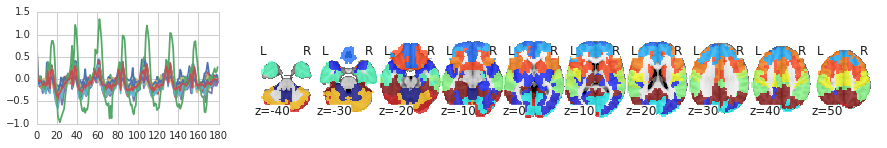

In [361]:
def load_im(path_im):
    # load data
    im_ref = nib.load(path_im)
    #im_ref = nib.Minc2Image(im_ref.get_data(), im_ref.get_affine())
    
    return im_ref

def show_map(path_im,path_out='',n_slice=6, axes=None):
    im_ref = load_im(path_im)
    print (25+45)/6.
    #plt.figure()
    #plotting.plot_stat_map(im_ref, display_mode='z',cut_coords=(range(-25,45,12)))
    ## Display partitions
    
    display = plotting.plot_anat(
                                 colorbar=False,
                                 #title="Consensus Partition %i"%(100),
                                 display_mode='z',
                                 cut_coords= range(-40, 60, 10),
                                 axes=axes
                                 )

    display.add_overlay(im_ref,cmap=cm.jet,alpha=0.7)

def show_stat(path_im,path_out='',n_slice=6, axes=None):
    im_ref = load_im(path_im)
    plotting.plot_stat_map(im_ref,
                           display_mode='z',
                           cut_coords=range(-40, 60, 10),
                           alpha=0.7)

    

def show_fir(path_im, fir_path):
    fir_mat = scipy.io.loadmat(fir_path)
    ###fir
    test_fir = fir_mat['test_fir']
    val_test_fir = test_fir[0,0]
    fir_mean = val_test_fir['mean']
    fir_std = val_test_fir['std']
    fir_pce = val_test_fir['pce']
    fir_test = val_test_fir['test']
    fir_ttest = val_test_fir['ttest']
    ### diff fir
    test_diff = fir_mat['test_diff']
    val_test_diff = test_diff[0,0]
    fir_diff_mean = val_test_diff['mean']
    fir_diff_std = val_test_diff['std']
    fir_diff_pce = val_test_diff['pce']
    fir_diff_test = val_test_diff['test']
    fir_diff_ttest = val_test_diff['ttest']
    
    #gridspec=GridSpec(shape[0], shape[2])
    #subplotspec=gridspec.new_subplotspec(loc, rowspan, colspan)
    #subplot(subplotspec)
    
    fig = plt.figure(figsize=(15,2))
    ax1 = plt.subplot2grid((5, 4), (0, 0), rowspan=5)
    plt.plot(fir_mean)
    #ax2 = plt.subplot2grid((5, 4), (0, 1))
    #plt.text(0,0,'Scale 15')
    ax3 = plt.subplot2grid((5, 4), (1, 1), colspan=3, rowspan=4)
    show_map(path_im,'',axes=ax3)


    
show_fir('/Users/christian/data/fir_demo/brain_partition_consensus_group_sci15_scg15_scf15.nii.gz','/Users/christian/data/fir_demo/fdr_group_average_sci15_scg15_scf15.mat')    
# save the image in a file

#/Users/christian/data/fir_demo/brain_partition_consensus_group_sci15_scg15_scf15.nii.gz



#show_map('/Users/christian/Dropbox/McGill-publication/Papers/Multisite/figures/network_basc.mnc')
    

In [336]:
from Proteus.proteus.predic import clustering as hc
from Proteus.proteus.matrix import tseries as ts
from Proteus.proteus.visu import matrix as vis
import matplotlib.gridspec as gridspec
from matplotlib.pylab import *
#reload(vis.matrix)
reload(ts)
reload(hc)

def mapvec(v,partition):
    new_map = copy.deepcopy(partition)
    im = new_map.get_data()
    
    part = partition.get_data()  
    for i in range(len(v)):
        idxs = np.where(part==(i+1))
        im[idxs] = v[i]
    return new_map

In [42]:



new_map = copy.deepcopy(im_ref)
network_map = new_map.get_data()
    
network_map = network_map==1
network_map = network_map.astype(int)

    

In [44]:
#nn_map = mapvec(site_std_tmp[selected_network_idx,:],im_ref)

new_map.shape

(52, 64, 53)

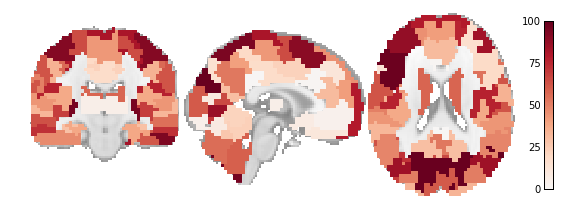

In [50]:
plotting.plot_stat_map (im_ref,
                        cmap=cm.RdBu_r,
                        annotate=False,
                        draw_cross=False,
                        colorbar=True,
                        )

11.6666666667


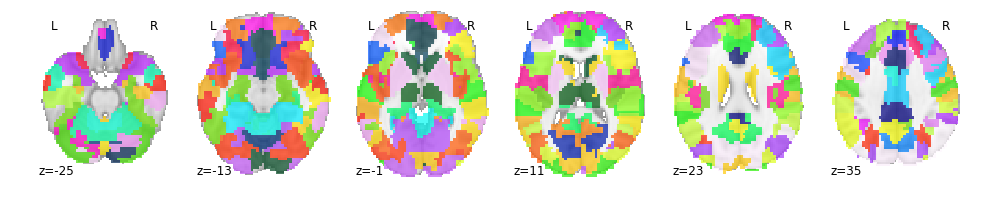

[-25, -15, -5, 5, 15, 25, 35, 45]

# GLM-Connectome

In [212]:
ls /Users/christian/data/conn_demo/cobre_glm_BH_msteps_bascglm_20141101_nii/

logs/                 sci10_scg7_scf7/      sci20_scg14_scf16/    sci270_scg324_scf328/ sci60_scg54_scf55/
permutation_test/     sci120_scg108_scf114/ sci210_scg189_scf199/ sci30_scg27_scf25/    summary_findings.csv


In [216]:
main_path = '/Users/christian/data/conn_demo/cobre_glm_BH_msteps_bascglm_20141101_nii/'

### Plot summary findings

In [219]:
import pandas as pd
summ_find = pd.read_csv(main_path+'summary_findings.csv',index_col=0)
print summ_find

                      sci10_scg7_scf7   sci20_scg14_scf16   \
                                                             
szVScont_age_sex_FD           0.346939            0.289062   
sz_age_sex_FD                 1.000000            0.968750   
cont_age_sex_FD               1.000000            1.000000   

                      sci30_scg27_scf25   sci60_scg54_scf55   \
                                                               
szVScont_age_sex_FD               0.2384            0.211901   
sz_age_sex_FD                     0.9552            0.917355   
cont_age_sex_FD                   0.9776            0.962314   

                      sci120_scg108_scf114   sci210_scg189_scf199   \
                                                                     
szVScont_age_sex_FD                0.127886               0.090174   
sz_age_sex_FD                      0.875346               0.851165   
cont_age_sex_FD                    0.943983               0.929143   

                 

['szVScont age sex FD ' 'sz age sex FD ' 'cont age sex FD ']
['sci10_scg7_scf7 ' 'sci20_scg14_scf16 ' 'sci30_scg27_scf25 '
 'sci60_scg54_scf55 ' 'sci120_scg108_scf114 ' 'sci210_scg189_scf199 '
 'sci270_scg324_scf328 ' 'per_disc ' 'p']


'\nax = plt.table(cellText=summ_find.values[:,-2:],\n               rowLabels=legends_marker,\n               colLabels=get_res_labels(summ_find.columns.values[-2:]),\n               fontsize=10.0,\n               loc=2)\n'

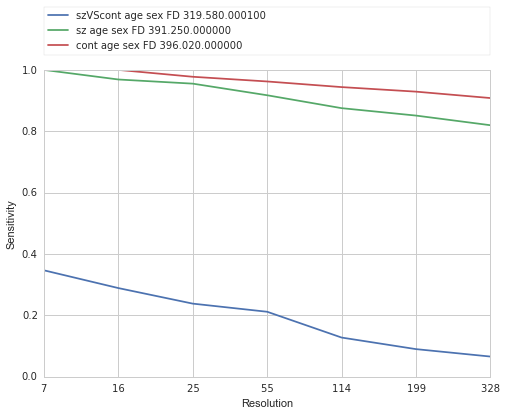

In [380]:
def get_res_labels(labels):
    new_labels = []
    n = len(labels)
    for i in range(n):
        idx = labels[i].find('scf')
        new_labels.append(labels[i][idx+3:])
        
    return new_labels

def clean_str(labels):
    new_labels = []
    n = len(labels)
    for i in range(n):
        labels[i] = labels[i].replace('_',' ')
    return labels
    
def make_marker(legends_marker, per_disc, p):
    legends_new = []
    fmt = "{v:s}{idx:d}{f1:0.2f}{f2:f}"
    for i in range(len(legends_marker)):
        tmp_perc = per_disc[i]*100
        legends_new.append(fmt.format(idx=3, v=legends_marker[i], f1=tmp_perc , f2=p[i]))
        #legends_new.append(legends_marker[i] + 'Discovery:' + tmp_perc + '% p-val=' + str(p[i]))
    return legends_new

print summ_find.index.values
print summ_find.columns.values

n_items = summ_find.values[:,:-2].shape[1]
x_labels = get_res_labels(summ_find.columns.values[:-2])
per_disc = summ_find.values[:,-2]
p = summ_find.values[:,-1]

plt.figure()
#plt.subplot2grid((2,1),(0,0))
plt.plot(summ_find.values[:,:-2].T)
plt.xticks(range(n_items), x_labels)

legends_marker = clean_str(summ_find.index.values)
legends_marker = make_marker(legends_marker,per_disc,p)
plt.legend(legends_marker,bbox_to_anchor=(0., 1.05, 1., .102), loc=3, ncol=1, mode="expand", borderaxespad=0.,frameon=True)
plt.xlabel('Resolution')
plt.ylabel('Sensitivity')


#plt.subplot2grid((2,1),(1,0))
'''
ax = plt.table(cellText=summ_find.values[:,-2:],
               rowLabels=legends_marker,
               colLabels=get_res_labels(summ_find.columns.values[-2:]),
               fontsize=10.0,
               loc=2)
'''
#matplotlib.rcParams.update({'font.size': 10})
#plt.subplots_adjust(left=0.2, bottom=-0.5)

#ax.text(0.05, 0.95, label, transform=ax.transAxes,
#     fontsize=16, fontweight='bold', va='top')


### Plot summary findings

11.6666666667


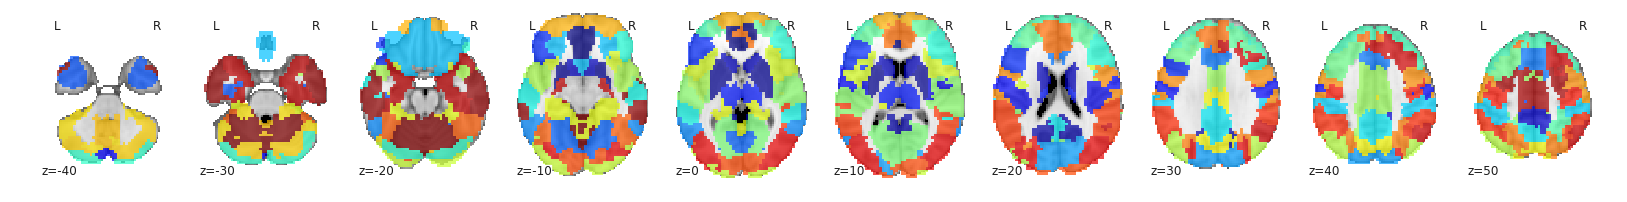

In [348]:
show_map('/Users/christian/data/conn_demo/cobre_glm_BH_msteps_bascglm_20141101_nii/sci60_scg54_scf55/networks_sci60_scg54_scf55.nii.gz')

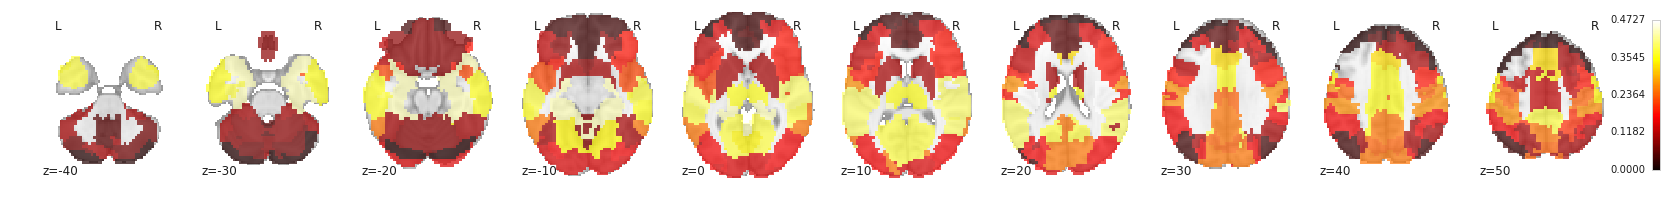

In [344]:

plt.figure(figsize=(5,2))
show_stat('/Users/christian/data/conn_demo/cobre_glm_BH_msteps_bascglm_20141101_nii/sci60_scg54_scf55/szVScont_age_sex_FD/perc_disc_szVScont_age_sex_FD_sci60_scg54_scf55.nii.gz')

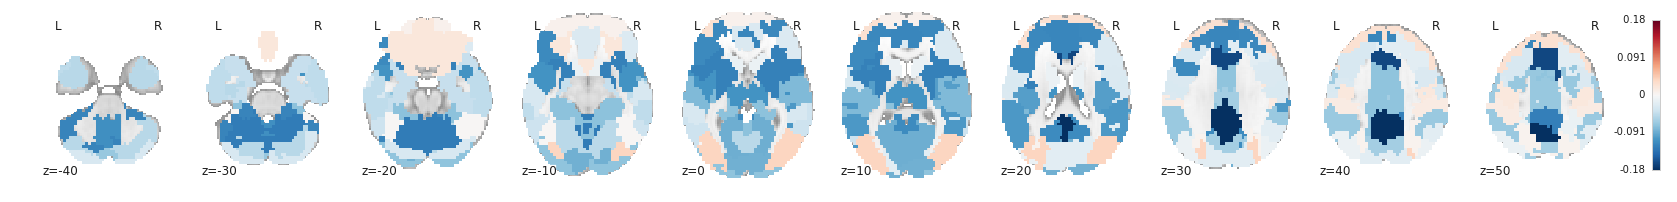

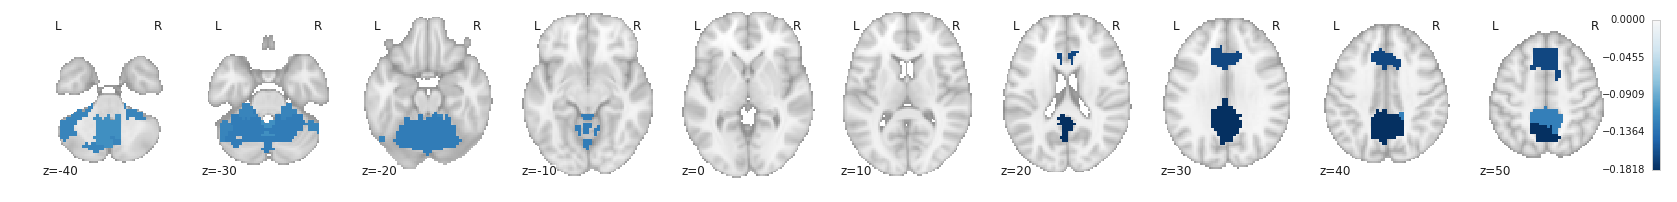

In [379]:
def show_data(data,path_out='',n_slice=6, axes=None):
    plotting.plot_stat_map(data,
                           cmap=cm.RdBu_r,
                           display_mode='z',
                           cut_coords=range(-40, 60, 10),
                           #alpha=0.9
                          )

def show_effect(fdr_maps,effect_maps,netid=1):
    im_eff = load_im(effect_maps)
    im_fdr = load_im(fdr_maps)
    mask = im_fdr.get_data()
    
    mask.shape
    plt.figure()
    new_im = nib.Nifti1Image(im_eff.get_data()[:,:,:,netid], im_eff.get_affine())
    show_data(new_im)
    #plt.figure()
    #new_im = nib.Nifti1Image(mask[:,:,:,netid], im_eff.get_affine())
    #show_data(new_im)
    plt.figure()
    new_im = nib.Nifti1Image(im_eff.get_data()[:,:,:,netid]*(mask[:,:,:,netid]!=0), im_eff.get_affine())
    show_data(new_im)
    
    return im_eff,im_fdr


im_eff,im_fdr = show_effect(main_path + 'sci60_scg54_scf55/szVScont_age_sex_FD/fdr_szVScont_age_sex_FD_sci60_scg54_scf55.nii.gz', main_path + 'sci60_scg54_scf55/szVScont_age_sex_FD/effect_szVScont_age_sex_FD_sci60_scg54_scf55.nii.gz',50)


